In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style = "white" , color_codes=True)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
iris.shape

(150, 6)

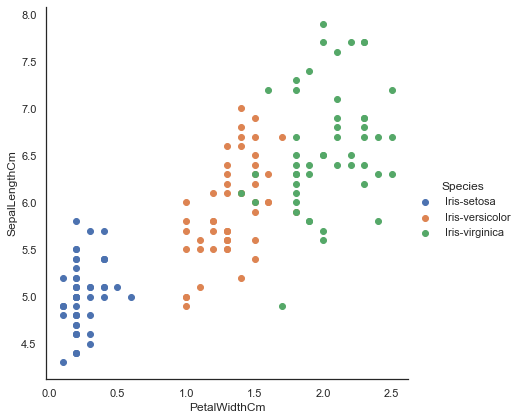

In [5]:
sns.FacetGrid(iris , hue="Species" , height = 6).map(plt.scatter,"PetalWidthCm","SepalLengthCm").add_legend()

-here we can say that setosa will have accuracy of 100%only by looking to the plot 

converting categorical variables to numbers

In [6]:
num_specie = {'Iris-setosa' : 0 , 'Iris-versicolor' : 1 , 'Iris-virginica' : 2}
iris['Species'] =iris['Species'].map(num_specie)
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

preparing features and calsses

In [9]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
y = iris['Species'].values
x_train , x_test , y_train , y_test = train_test_split( x , y ,test_size=0.3, random_state=21, stratify=y )

fitting model

In [10]:
model = LogisticRegression()
model.fit(x_train , y_train)

C:\Users\kamel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
accuracy = model.score(x_test , y_test)
print(accuracy)

0.9777777777777777


In [14]:
expected = y 
predicted = model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [16]:
print(metrics.classification_report(expected , predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



it is better to use metrics.classification_report rather than score in some cases as its more precise , and as ecpected class o has accuracy of 100%

In [17]:
print(metrics.confusion_matrix(expected , predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


50 are classified as setosa

47 are classified as versicolor and 3 as virginica

1 is classified as versicolor and 49 as virginica